## 1 Data Collection

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/Nadir/Desktop/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 2 Data Inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.value_counts("ocean_proximity")

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

## 3 Data Cleaning

In [6]:
# Calculate the mean of the 'total_bedrooms' column (ignoring NaN values)
mean_total_bedrooms = df['total_bedrooms'].mean(skipna=True)

# Fill NaN values in the 'total_bedrooms' column with the mean value
df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_total_bedrooms).astype(int)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  int32  
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(8), int32(1), object(1)
memory usage: 1.5+ MB


## 4 ocean_proximity Srng Data Transformation

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
# Function to apply one-hot encoding to a column and merge it back to the DataFrame
def apply_one_hot_encoding(df, column):
    one_hot_encoded = pd.get_dummies(df[column], prefix=column)
    one_hot_encoded = one_hot_encoded.astype(int)
    df = pd.concat([df, one_hot_encoded], axis=1)
    df.drop(column, axis=1, inplace=True)
    return df

# Apply one-hot encoding to 'Department'
df = apply_one_hot_encoding(df, 'ocean_proximity')

# Display the DataFrame with one-hot encoded columns
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [10]:
# Moving 'median_house_value' column to the last position
cols = list(df.columns)
cols.remove('median_house_value')  # Remove 'median_house_value' from the list of columns
cols.append('median_house_value')  # Append 'median_house_value' to the end of the list
df = df[cols]

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280,565.0,259.0,3.8462,0,0,0,1,0,342200.0


## 5 Data Visualization

### Box Plot

In [11]:
import matplotlib.pyplot as plt

In [12]:
# Columns to check for outliers
columns_selection = df.columns

# Define a function to identify outliers using IQR method
def identify_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return (series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))

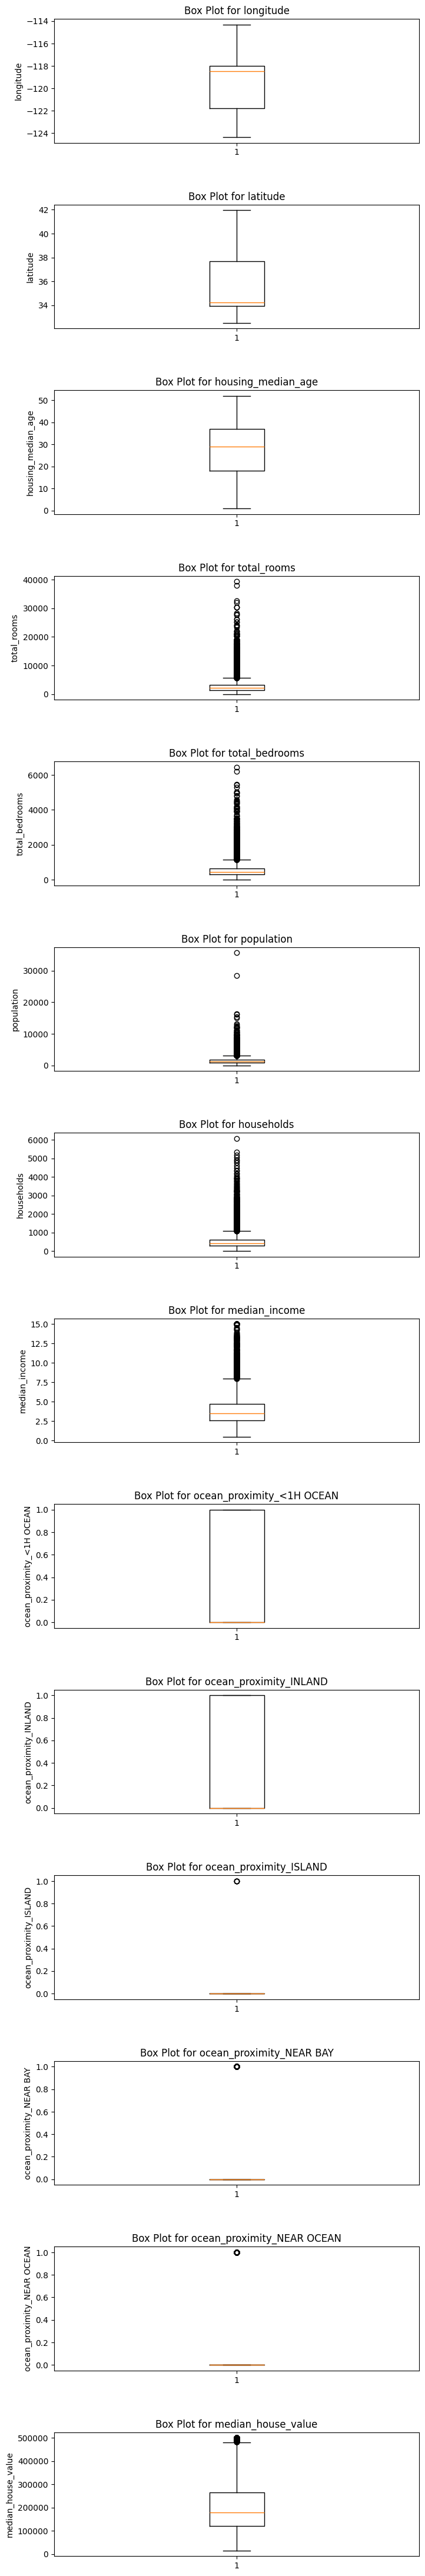

In [13]:
# Create subplots for each column
fig, axes = plt.subplots(nrows=len(columns_selection), ncols=1, figsize=(8, 4 * len(columns_selection)))
fig.subplots_adjust(hspace=0.5)

# Loop through each selected column
for i, column in enumerate(columns_selection):
    # Draw box plot
    axes[i].boxplot(df[column])
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

# Show the box plots and outliers
plt.show()

### Histograms

In [14]:
import math

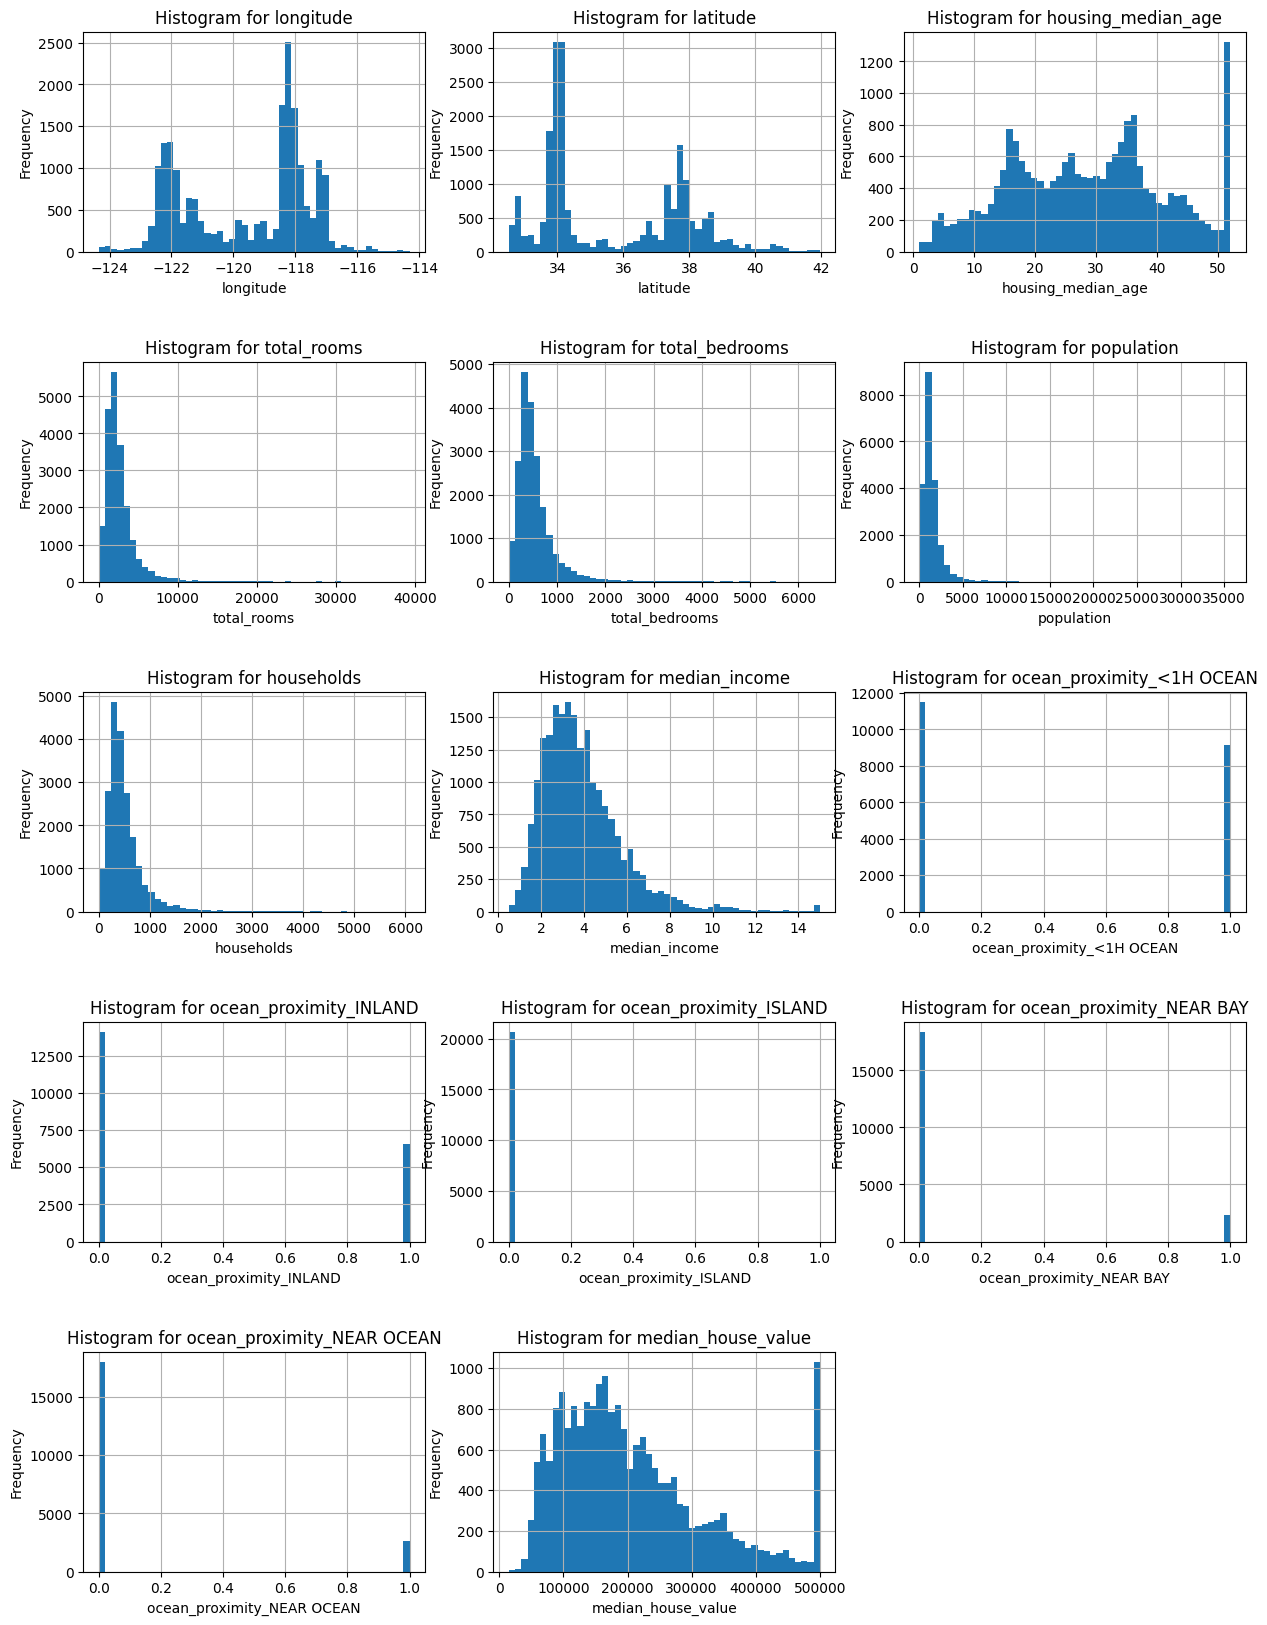

In [15]:
# Calculate the number of rows and columns for subplots
num_columns = 3
num_rows = math.ceil(len(columns_selection) / num_columns)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Loop through each selected column
for i, column in enumerate(columns_selection):
    row_num = i // num_columns
    col_num = i % num_columns

    # Plot histogram with bins=50
    df[column].hist(bins=50, ax=axes[row_num, col_num])
    axes[row_num, col_num].set_title(f'Histogram for {column}')
    axes[row_num, col_num].set_xlabel(column)
    axes[row_num, col_num].set_ylabel('Frequency')

# Remove any empty subplots
for i in range(len(columns_selection), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

# Show the histograms
plt.show()

### Correlation matrix

In [16]:
import seaborn as sns

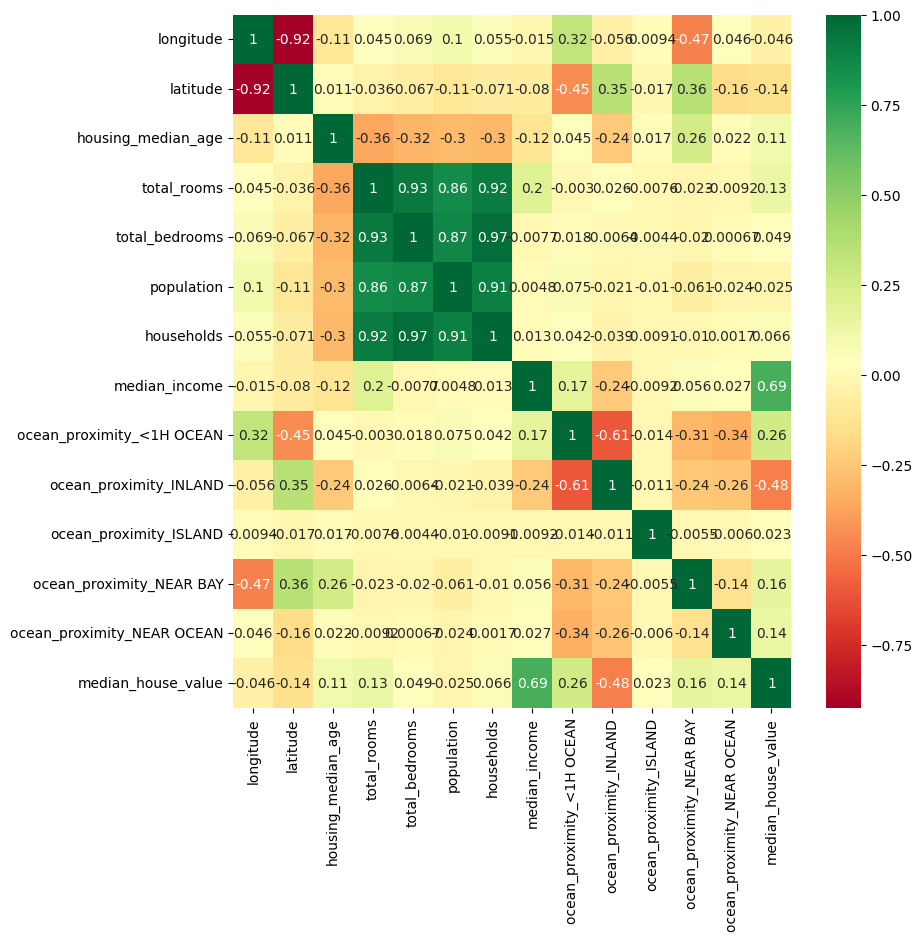

In [17]:
# calculate correlation matrix
corrmat = df.corr()

# select column names for plotting
top_corr_features = corrmat.index

# plot heat map
plt.figure(figsize=(9, 9))
g = sns.heatmap(corrmat[top_corr_features].loc[top_corr_features], annot=True, cmap="RdYlGn")
plt.show()

## 6 Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# Extract the other column names (excluding the first one)
columns_to_scale = df.columns[:-1]

# Initialize the StandardScaler
scaler = StandardScaler()

# Standard scale the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the DataFrame
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,452600.0
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,358500.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,352100.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,341300.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,342200.0


## 7 Data Pipeline

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Load the data from the CSV file
df = pd.read_csv('C:/Users/Nadir/Desktop/housing.csv')

# Fill NaN values in the 'total_bedrooms' column with the mean value
mean_total_bedrooms = df['total_bedrooms'].mean(skipna=True)
df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_total_bedrooms).astype(int)

# Function to apply one-hot encoding to a column and merge it back to the DataFrame
def apply_one_hot_encoding(df, column):
    one_hot_encoded = pd.get_dummies(df[column], prefix=column)
    one_hot_encoded = one_hot_encoded.astype(int)
    df = pd.concat([df, one_hot_encoded], axis=1)
    df.drop(column, axis=1, inplace=True)
    return df

# Apply one-hot encoding to 'ocean_proximity'
df = apply_one_hot_encoding(df, 'ocean_proximity')

# Moving 'median_house_value' column to the last position
cols = list(df.columns)
cols.remove('median_house_value')  # Remove 'median_house_value' from the list of columns
cols.append('median_house_value')  # Append 'median_house_value' to the end of the list
df = df[cols]

# Standard scale the selected columns
columns_to_scale = df.columns[:-1]
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the DataFrame
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,452600.0
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,358500.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,352100.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,341300.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,342200.0
